# Regional MOM6 NWA marine heatwave
- using the reforecast(hindcast) of regional mom6 to investigate the marine heatwave in NWA 
- the climatology period is set to 1993-2023 (30 years)

## Calculate Period Specific Climatology

In [1]:
import xarray as xr
import numpy as np
from dask.distributed import Client
from mom6.mom6_module import mom6_io

In [2]:
### open local cluster
client = Client(processes=False)
print(client)
print(client.cluster.dashboard_link)

<Client: 'inproc://10.173.16.4/2397320/1' processes=1 threads=96, memory=0.98 TiB>
http://10.173.16.4:8787/status


In [3]:
FORECAST = mom6_io.MOM6Forecast(
    var='tos',
    data_relative_dir='forecast/',
    static_relative_dir='static/',
    grid='raw',
    source='local')

In [4]:
ds_forecast = FORECAST.get_all()

In [5]:
ds_forecast

<xarray.Dataset> Size: 76GB
Dimensions:       (xh: 775, yh: 845, xq: 776, yq: 846, init: 120, member: 10,
                   lead: 12)
Coordinates: (12/16)
  * xh            (xh) float64 6kB -98.0 -97.92 -97.84 ... -36.24 -36.16 -36.08
  * yh            (yh) float64 7kB 5.273 5.352 5.432 5.511 ... 51.9 51.91 51.93
  * xq            (xq) float64 6kB -98.04 -97.96 -97.88 ... -36.2 -36.12 -36.04
  * yq            (yq) float64 7kB 5.233 5.312 5.392 5.472 ... 51.9 51.92 51.94
    geolon        (yh, xh) float32 3MB ...
    geolat        (yh, xh) float32 3MB ...
    ...            ...
    geolon_v      (yq, xh) float32 3MB ...
    geolat_v      (yq, xh) float32 3MB ...
  * init          (init) datetime64[ns] 960B 1993-03-01 ... 2022-12-01
  * lead          (lead) int32 48B 0 1 2 3 4 5 6 7 8 9 10 11
  * member        (member) int32 40B 1 2 3 4 5 6 7 8 9 10
    month         (init) int32 480B 3 6 9 12 3 6 9 12 3 ... 12 3 6 9 12 3 6 9 12
Data variables: (12/19)
    areacello     (yh, xh) float32 3MB ...
    deptho        (yh, xh) float32 3MB ...
    sftof         (yh, xh) float32 3MB ...
    Coriolis      (yq, xq) float32 3MB ...
    wet           (yh, xh) float32 3MB ...
    wet_c         (yq, xq) float32 3MB ...
    ...            ...
    dyCv          (yq, xh) float32 3MB ...
    areacello_cu  (yh, xq) float32 3MB ...
    areacello_cv  (yq, xh) float32 3MB ...
    areacello_bu  (yq, xq) float32 3MB ...
    tos           (init, member, lead, yh, xh) float32 38GB dask.array<chunksize=(1, 10, 12, 845, 775), meta=np.ndarray>
    tos_anom      (init, member, lead, yh, xh) float32 38GB dask.array<chunksize=(1, 10, 12, 845, 775), meta=np.ndarray>
Attributes:
    NumFilesInSet:  1
    title:          NWA12_MOM6_v1.0
    grid_type:      regular
    grid_tile:      N/A

In [6]:
iyear = 1993
fyear = 2022
da_sst_climo = (
    ds_forecast
    .tos
    .sel(init=slice(f'{iyear}-01',f'{fyear}-12'))
    .mean(dim='member')
    .groupby('init.month')
    .mean(dim='init')
).compute()

In [7]:
da_sst_climo

<xarray.DataArray 'tos' (month: 4, lead: 12, yh: 845, xh: 775)> Size: 126MB
array([[[[       nan,        nan,        nan, ..., 27.009989 ,
          27.019514 , 27.032867 ],
         [       nan,        nan,        nan, ..., 27.00194  ,
          27.011576 , 27.022558 ],
         [       nan,        nan,        nan, ..., 26.991453 ,
          27.000628 , 27.01015  ],
         ...,
         [       nan,        nan,        nan, ...,  4.792766 ,
           4.805158 ,  4.8085427],
         [       nan,        nan,        nan, ...,  4.772153 ,
           4.777704 ,  4.778551 ],
         [       nan,        nan,        nan, ...,  4.716612 ,
           4.7133594,  4.7083683]],

        [[       nan,        nan,        nan, ..., 27.236385 ,
          27.24528  , 27.263268 ],
         [       nan,        nan,        nan, ..., 27.217203 ,
          27.22629  , 27.24082  ],
         [       nan,        nan,        nan, ..., 27.200031 ,
          27.20846  , 27.220451 ],
...
         [       nan,        nan,        nan, ...,  8.9111395,
           8.98242  ,  8.993536 ],
         [       nan,        nan,        nan, ...,  8.852629 ,
           8.935037 ,  8.968702 ],
         [       nan,        nan,        nan, ...,  8.679799 ,
           8.779358 ,  8.859502 ]],

        [[       nan,        nan,        nan, ..., 28.323544 ,
          28.321049 , 28.315874 ],
         [       nan,        nan,        nan, ..., 28.366644 ,
          28.365002 , 28.359968 ],
         [       nan,        nan,        nan, ..., 28.387798 ,
          28.38687  , 28.382345 ],
         ...,
         [       nan,        nan,        nan, ...,  7.5440893,
           7.5988173,  7.5951824],
         [       nan,        nan,        nan, ...,  7.5031343,
           7.5710964,  7.5855684],
         [       nan,        nan,        nan, ...,  7.3512073,
           7.438815 ,  7.4958115]]]], dtype=float32)
Coordinates:
  * xh       (xh) float64 6kB -98.0 -97.92 -97.84 ... -36.24 -36.16 -36.08
  * yh       (yh) float64 7kB 5.273 5.352 5.432 5.511 ... 51.88 51.9 51.91 51.93
    geolon   (yh, xh) float32 3MB -98.0 -97.92 -97.84 ... -37.36 -37.27 -37.19
    geolat   (yh, xh) float32 3MB 5.273 5.273 5.273 5.273 ... 58.15 58.16 58.16
  * lead     (lead) int32 48B 0 1 2 3 4 5 6 7 8 9 10 11
  * month    (month) int64 32B 3 6 9 12
Attributes:
    units:          degC
    long_name:      Sea Surface Temperature
    cell_methods:   area:mean yh:mean xh:mean time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_surface_temperature

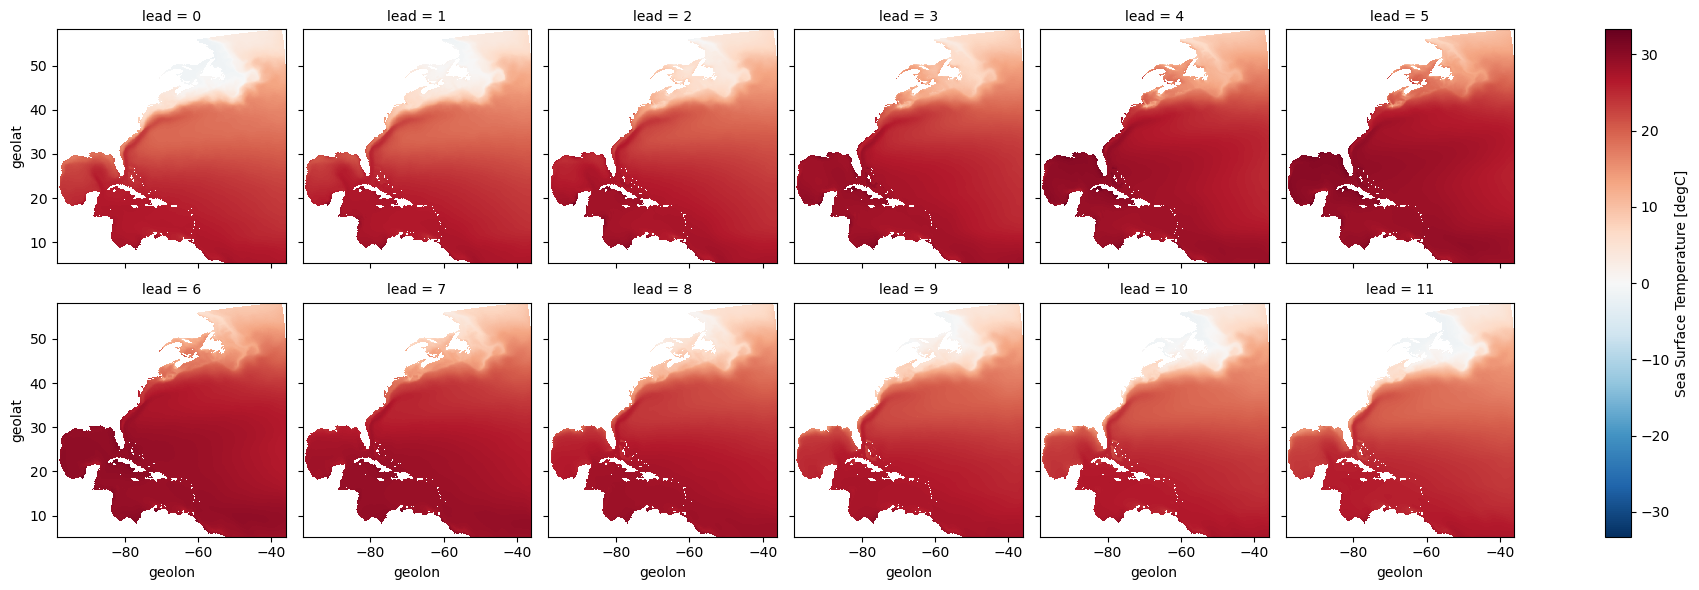

In [8]:
da_sst_climo.sel(month=3).plot(x='geolon',y='geolat',col='lead',col_wrap=6)

In [9]:
year = 2022
da_sst_anom = (
ds_forecast
    .tos
    .sel(init=slice(f'{year}-01',f'{year}-12'))
    .groupby('init.month')
- da_sst_climo
).persist()

In [10]:
da_sst_anom

<xarray.DataArray 'tos' (init: 4, member: 10, lead: 12, yh: 845, xh: 775)> Size: 1GB
dask.array<sub, shape=(4, 10, 12, 845, 775), dtype=float32, chunksize=(1, 10, 12, 845, 775), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 6kB -98.0 -97.92 -97.84 ... -36.24 -36.16 -36.08
  * yh       (yh) float64 7kB 5.273 5.352 5.432 5.511 ... 51.88 51.9 51.91 51.93
    geolon   (yh, xh) float32 3MB -98.0 -97.92 -97.84 ... -37.36 -37.27 -37.19
    geolat   (yh, xh) float32 3MB 5.273 5.273 5.273 5.273 ... 58.15 58.16 58.16
  * init     (init) datetime64[ns] 32B 2022-03-01 2022-06-01 ... 2022-12-01
  * lead     (lead) int32 48B 0 1 2 3 4 5 6 7 8 9 10 11
  * member   (member) int32 40B 1 2 3 4 5 6 7 8 9 10
    month    (init) int32 16B 3 6 9 12
Attributes:
    units:          degC
    long_name:      Sea Surface Temperature
    cell_methods:   area:mean yh:mean xh:mean time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_surface_temperature

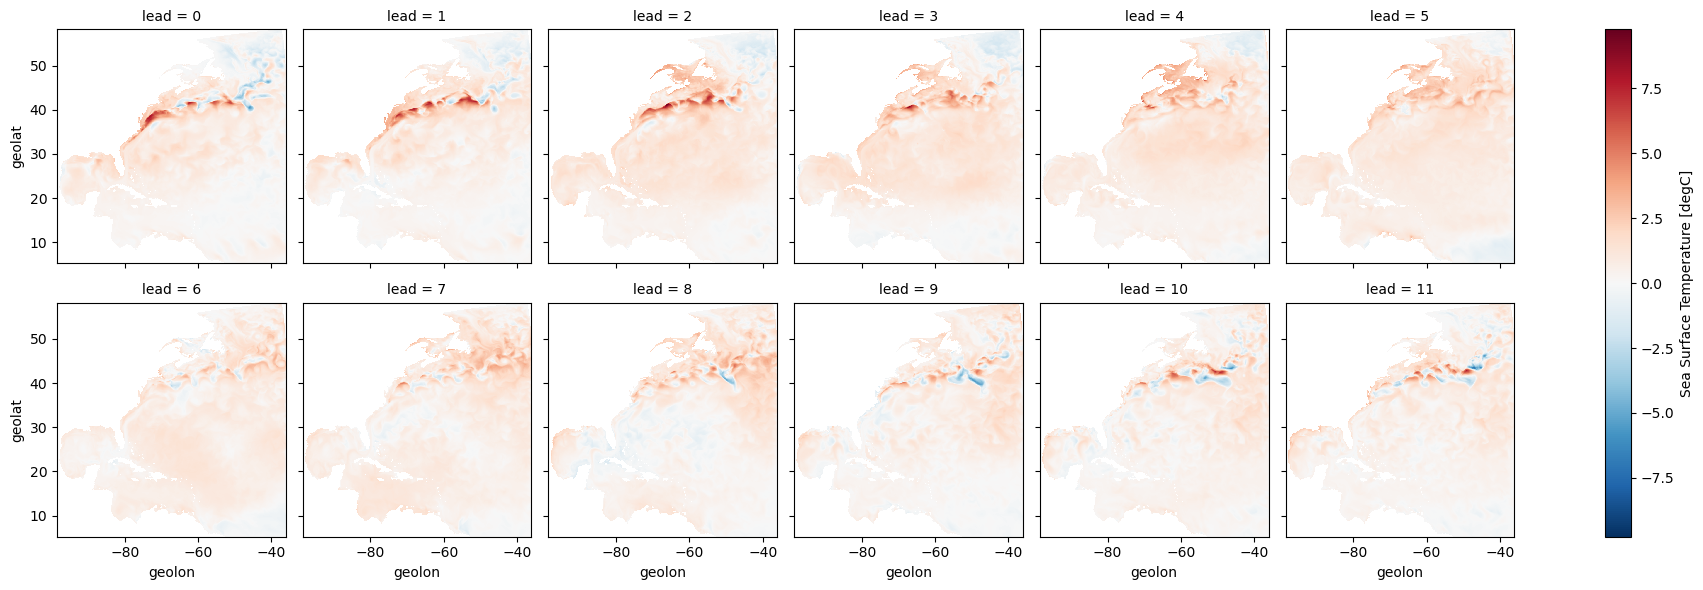

In [11]:
da_sst_anom.sel(member=1).sel(init='2022-03').plot(x='geolon',y='geolat',col='lead',col_wrap=6)

In [12]:
def regional_mom6_quantile(
    da_data : xr.DataArray,
    mhw_threshold : float = 90.,
    initialization_name : str = 'init',
    member_name : str = 'member'
    # lead_name : str = 'lead',
    # xdim_name : str = 'xh',
    # ydim_name : str = 'yh'
) -> xr.DataArray :
    """
    This function is designed for calculating the regional mom6 
    marine heatwave threshold.
    
    The threshold is calculated for each initialization month 
    and lead time dependent

    Parameters
    ----------
    da_data : xr.DataArray 
        The sea surface temperature dataarray containing the period
        of data that is going to be used for determine the threshold.
        Data can be lazily loaded.
    mhw_threshold : float
        the quantile one wants to calculate (range from 1.-99.). 
        Default is 90.

    Returns
    -------
    da_data_quantile : xr.DataArray
        The xr.DataArray for the quantile 

    Raises
    ------

    """
    
    # da_data_quantile = xr.DataArray(
    #     coords={
    #         xdim_name:da_data[xdim_name],
    #         ydim_name:da_data[ydim_name],
    #         lead_name:da_data[lead_name],
    #         'month':np.arange(3,13,3)
    #     },
    #     dims = ['month',lead_name,ydim_name,xdim_name]
    # )

    da_threshold_list = []
    for i in np.arange(3,13,3):
        da_threshold_list.append(
            da_data
            .where(
                da_data[f'{initialization_name}.month'] == i,
                drop=True
            )
            .stack(allens=(initialization_name,member_name))
            .chunk(dict(allens=-1))
            .quantile(mhw_threshold*0.01, dim = 'allens', method='linear',skipna = True)
        )

    da_threshold = xr.concat(da_threshold_list, dim='month')
    da_threshold['month'] = np.arange(3,13,3)

    return da_threshold
    

In [13]:
da_threshold = regional_mom6_quantile(da_sst_anom.sel(init=slice(f'{iyear}-01',f'{fyear}-12')))

In [14]:
da_threshold.month

<xarray.DataArray 'month' (month: 4)> Size: 32B
array([ 3,  6,  9, 12])
Coordinates:
    quantile  float64 8B 0.9
  * month     (month) int64 32B 3 6 9 12

In [15]:
da_mhw = da_sst_anom.sel(init='2022-03').where(da_sst_anom.sel(init='2022-03')>=da_threshold.sel(month=3)).compute()

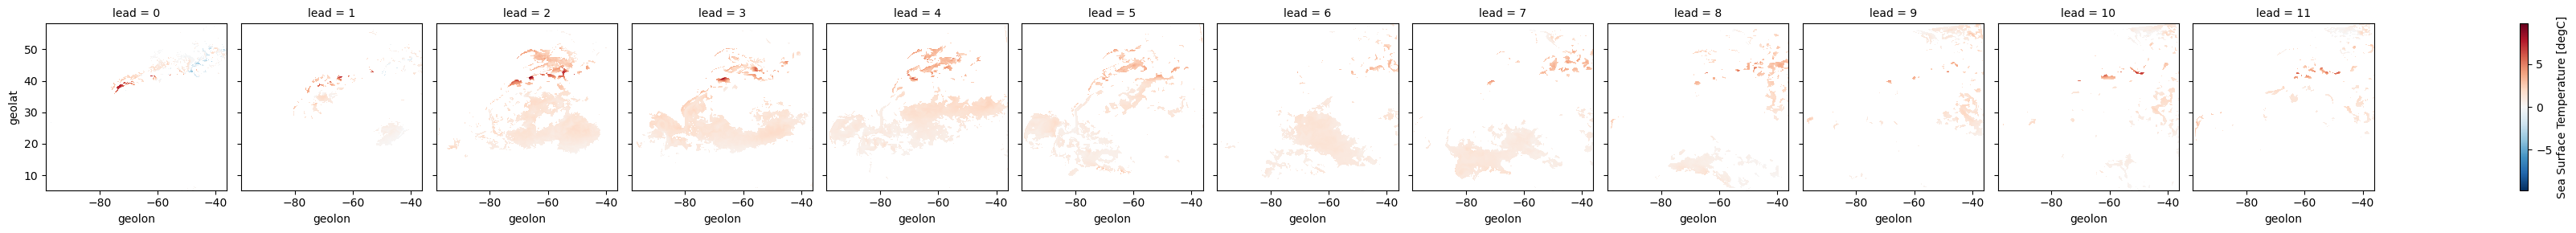

In [18]:
da_mhw.sel(member=1).plot(x='geolon',y='geolat',col='lead')